# Stock Market Anomaly Detection: Process We Can Follow

Anomalies in the stock market are important because they can indicate opportunities or risks. For example, a sudden spike in a stock’s price could be due to positive news about the company or its industry, which signals a potential investment opportunity. Conversely, an unexpected price drop could warn of underlying issues or market sentiment changes, which signals a risk that investors may need to manage.

Below is the process we can follow for the task of stock market anomaly detection:

+ Gather historical stock market data, including prices (open, high, low, close, adjusted close) and trading volumes.
+ Develop additional features that may help in detecting anomalies, such as moving averages, relative strength index (RSI), or percentage changes over specific periods.
+ Visualize the data to identify potential outliers or unusual patterns across time.
+ Employ statistical methods like Z-score analysis, where data points that are a certain number of standard deviations away from the mean are flagged as anomalies.
+ Use the insights gained from anomaly detection to inform investment decisions, risk management, and strategic planning.



## Collecting Real-time Stock Market Data using Python

Before getting started with Stock Market Anomaly Detection, Real-time stock market data of several companies will e collected. The yfinance API will be used. You can install it on your Python virtual environment (if you don't have it) by using the command mentioned below on your terminal or the command prompt:

+ pip install yfinance

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
from datetime import date, timedelta
import matplotlib.pyplot as plt
import seaborn as sns



The data we collected contains the following columns:

+ Date: The date of the stock data entry.
+ Ticker: The stock ticker symbol.
+ Adj Close: The adjusted closing price of the stock, which accounts for any corporate actions like splits or dividends.
+ Close: The closing price of the stock.
+ High: The highest price of the stock during the trading day.
+ Low: The lowest price of the stock during the trading day.
+ Open: The opening price of the stock.
+ Volume: The number of shares traded during the day.

In [2]:
# define the time period
end_date = date.today().strftime('%Y-%m-%d')
start_date = (date.today() - timedelta(days = 365)).strftime("%Y-%m-%d")

# list of stocks tickers to download
tickers = ['AAPL', 'MSFT', 'NFLX', 'GOOG', 'TSLA']

market_data = yf.download(tickers, start = start_date,
                  end = end_date, progress=False)

# reset index to bring date into columns for the melt function
market_data = market_data.reset_index()

#melt the dateframe to make it long format where each row
# is a unique combination of date, Ticker and Attributes
market_data_melted = market_data.melt(id_vars=['Date'], var_name=['Attribute', 'Ticker'])

# pivot the melted data to have attributes (Open, High, Low etc.) as columns
market_data_pivoted = market_data_melted.pivot_table(index = ['Date', 'Ticker'],
                                                    columns = 'Attribute',
                                                    values = 'value',
                                                    aggfunc='first')
# reset index to turn multi-index into columns
stock_data = market_data_pivoted.reset_index()

stock_data.head()

Attribute,Date,Ticker,Adj Close,Close,High,Low,Open,Volume
0,2023-06-22,AAPL,186.264435,187.000000,187.050003,183.669998,183.740005,51245300.0
1,2023-06-22,GOOG,123.729202,123.870003,123.934998,119.599998,120.660004,20781900.0
2,2023-06-22,MSFT,337.681152,339.709991,340.119995,333.339996,334.119995,23556800.0
3,2023-06-22,NFLX,422.480011,422.480011,424.709991,418.679993,422.929993,4869500.0
4,2023-06-22,TSLA,264.609985,264.609985,265.000000,248.250000,250.770004,166875900.0


### Data Cleaning

In [3]:
# make a copy of the stock data
stock_data_or = stock_data.copy()

In [4]:
# Convert the date column to datetime format
stock_data_or['Date'] = pd.to_datetime(stock_data_or['Date'])

# set the date  as index of the dataframe
stock_data_or.set_index('Date', inplace= True)
stock_data_or.head()

Attribute,Ticker,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,,
2023-06-22,AAPL,186.264435,187.000000,187.050003,183.669998,183.740005,51245300.0
2023-06-22,GOOG,123.729202,123.870003,123.934998,119.599998,120.660004,20781900.0
2023-06-22,MSFT,337.681152,339.709991,340.119995,333.339996,334.119995,23556800.0
2023-06-22,NFLX,422.480011,422.480011,424.709991,418.679993,422.929993,4869500.0
2023-06-22,TSLA,264.609985,264.609985,265.000000,248.250000,250.770004,166875900.0


## Analysis

### 1. Variation of Adjusted Close Prices over Time

The graph below shows the adjusted closing prices of five different stocks:

+ AAPL (Apple Inc.)
+ GOOG (Alphabet Inc.)
+ MSFT (Microsoft Corporation)
+ NFLX (Netflix, Inc.)
+ and TSLA (Tesla, Inc.)

GOOG appears to have the highest price and shows a general uptrend throughout the period, despite some volatility. TSLA and AAPL also exhibit an uptrend, with AAPL’s stock price increasing more steadily. MSFT and NFLX display relatively lower prices compared to the others, with NFLX showing considerable fluctuation but remaining mostly flat, and MSFT demonstrating a slight downtrend towards the end of the period.

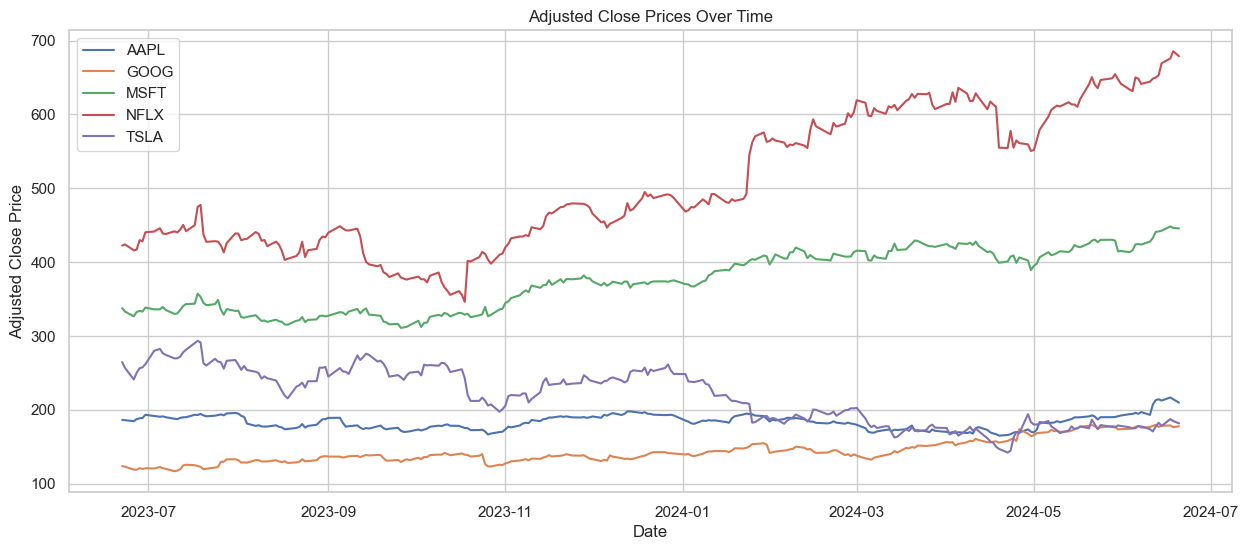

In [5]:
sns.set(style = 'whitegrid')

# plot adjusted close pries for each ticker  over time
plt.figure(figsize=(15, 6))
for ticker in stock_data_or['Ticker'].unique():
    subset = stock_data_or[stock_data_or['Ticker'] == ticker]
    plt.plot(subset.index, subset['Adj Close'], label = ticker)
    
plt.title('Adjusted Close Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.show()

### 2. Variation in trading volumes for each ticker over time

From the second graph, it is evident that AAPL and TSLA have the highest and most volatile trading volumes, with TSLA showing particularly large spikes. It suggests significant investor interest or reactions to events during those times. GOOG, while having the highest stock price, shows moderate and relatively stable trading volume. MSFT and NFLX have lower and less volatile trading volumes in comparison to AAPL and TSLA. The spikes and dips in trading volumes could correspond to earnings reports, product announcements, or other market-moving events for these companies.

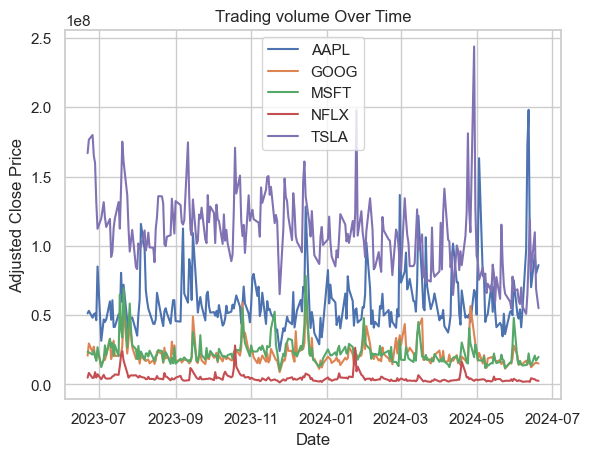

In [6]:
# Plot the trading volume for each tick over time
for ticker in stock_data_or['Ticker'].unique():
    subset = stock_data_or[stock_data_or['Ticker'] == ticker]
    plt.plot(subset.index, subset['Volume'], label = ticker)
    
plt.title('Trading volume Over Time')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.show()

### 4. Detecting Anomalies in the Stock Market
Given the variability and trends observed in both adjusted close prices and trading volumes, anomaly detection can focus on identifying:

+ Significant price movements that deviate from the stock’s typical price range or trend.
+ Unusual trading volumes that stand out from the normal trading activity.

For the task of stock market anomaly detection, we can use the Z-score method, which identifies anomalies based on how many standard deviations away a data point is from the mean. A common threshold for identifying an anomaly is a Z-score greater than 2 or less than -2, which corresponds to data points that are more than 2 standard deviations away from the mean.

We will compute the Z-scores for both the adjusted close prices and trading volumes for each stock and then identify any data points that exceed this threshold:

In [8]:
from scipy.stats import zscore

# define a function to detect anomalies
def detect_anomalies(data, column):
    data_copy = data.copy()
    
    #calculate zcores and add them as new column
    data_copy['Z-score'] = zscore(data_copy[column])
    
    # find where the absolute zscore is greater than 2 (common threshold for anomalies)
    anomalies = data_copy[abs(data_copy['Z-score']) > 2]
    return anomalies

anomalies_adj_close = pd.DataFrame()
anomalies_volume = pd.DataFrame()

for ticker in stock_data_or['Ticker'].unique():
    data_ticker = stock_data_or[stock_data_or['Ticker'] == ticker]
    
    adj_close_anomalies = detect_anomalies(data_ticker, 'Adj Close')
    volume_anomalies = detect_anomalies(data_ticker, 'Volume')
    
    # merge data using concat
    anomalies_adj_close = pd.concat([anomalies_adj_close, adj_close_anomalies])
    anomalies_volume = pd.concat([anomalies_volume, volume_anomalies])
    

anomalies_adj_close.head()

Attribute,Ticker,Adj Close,Close,High,Low,Open,Volume,Z-score
Date,,,,,,,,
2024-06-11,AAPL,207.149994,207.149994,207.160004,193.630005,193.649994,172373300.0,2.399456
2024-06-12,AAPL,213.070007,213.070007,220.199997,206.899994,207.369995,198134300.0,2.995485
2024-06-13,AAPL,214.240005,214.240005,216.750000,211.600006,214.740005,97862700.0,3.113281
2024-06-14,AAPL,212.490005,212.490005,215.169998,211.300003,213.850006,70122700.0,2.937091
2024-06-17,AAPL,216.669998,216.669998,218.949997,212.720001,213.369995,93728300.0,3.357934


Now, let’s plot the adjusted close prices and trading volumes again for each company, highlighting the anomalies we detected

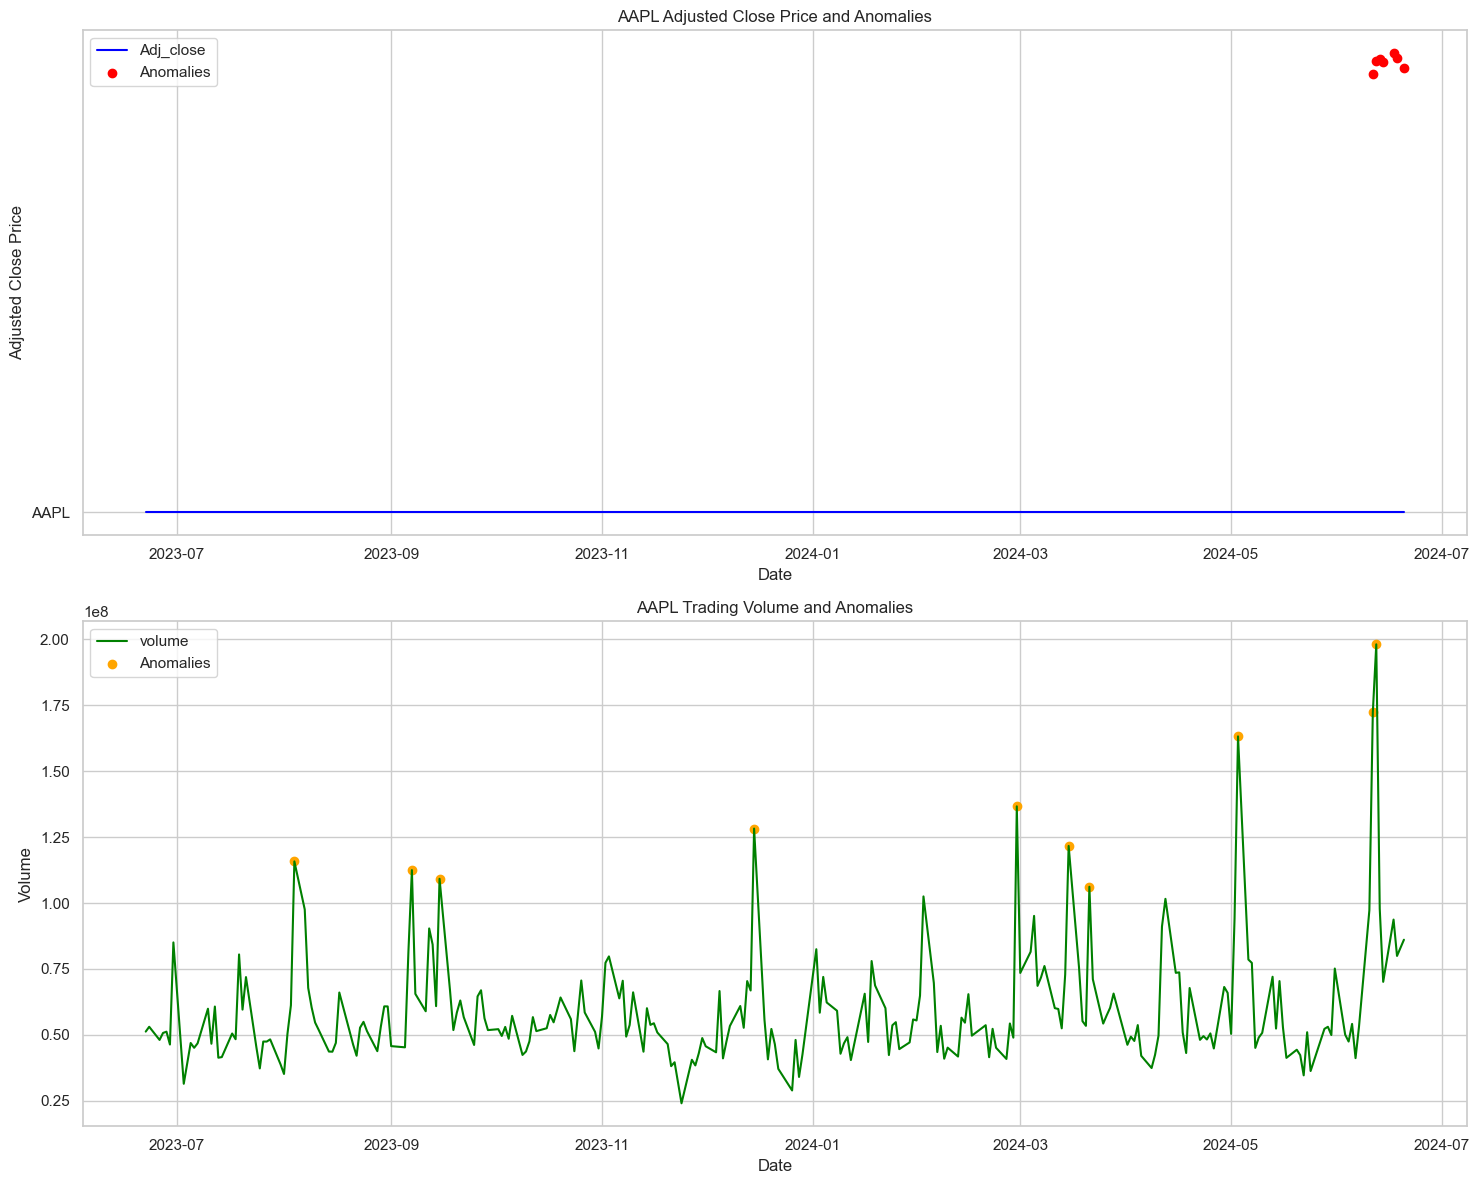

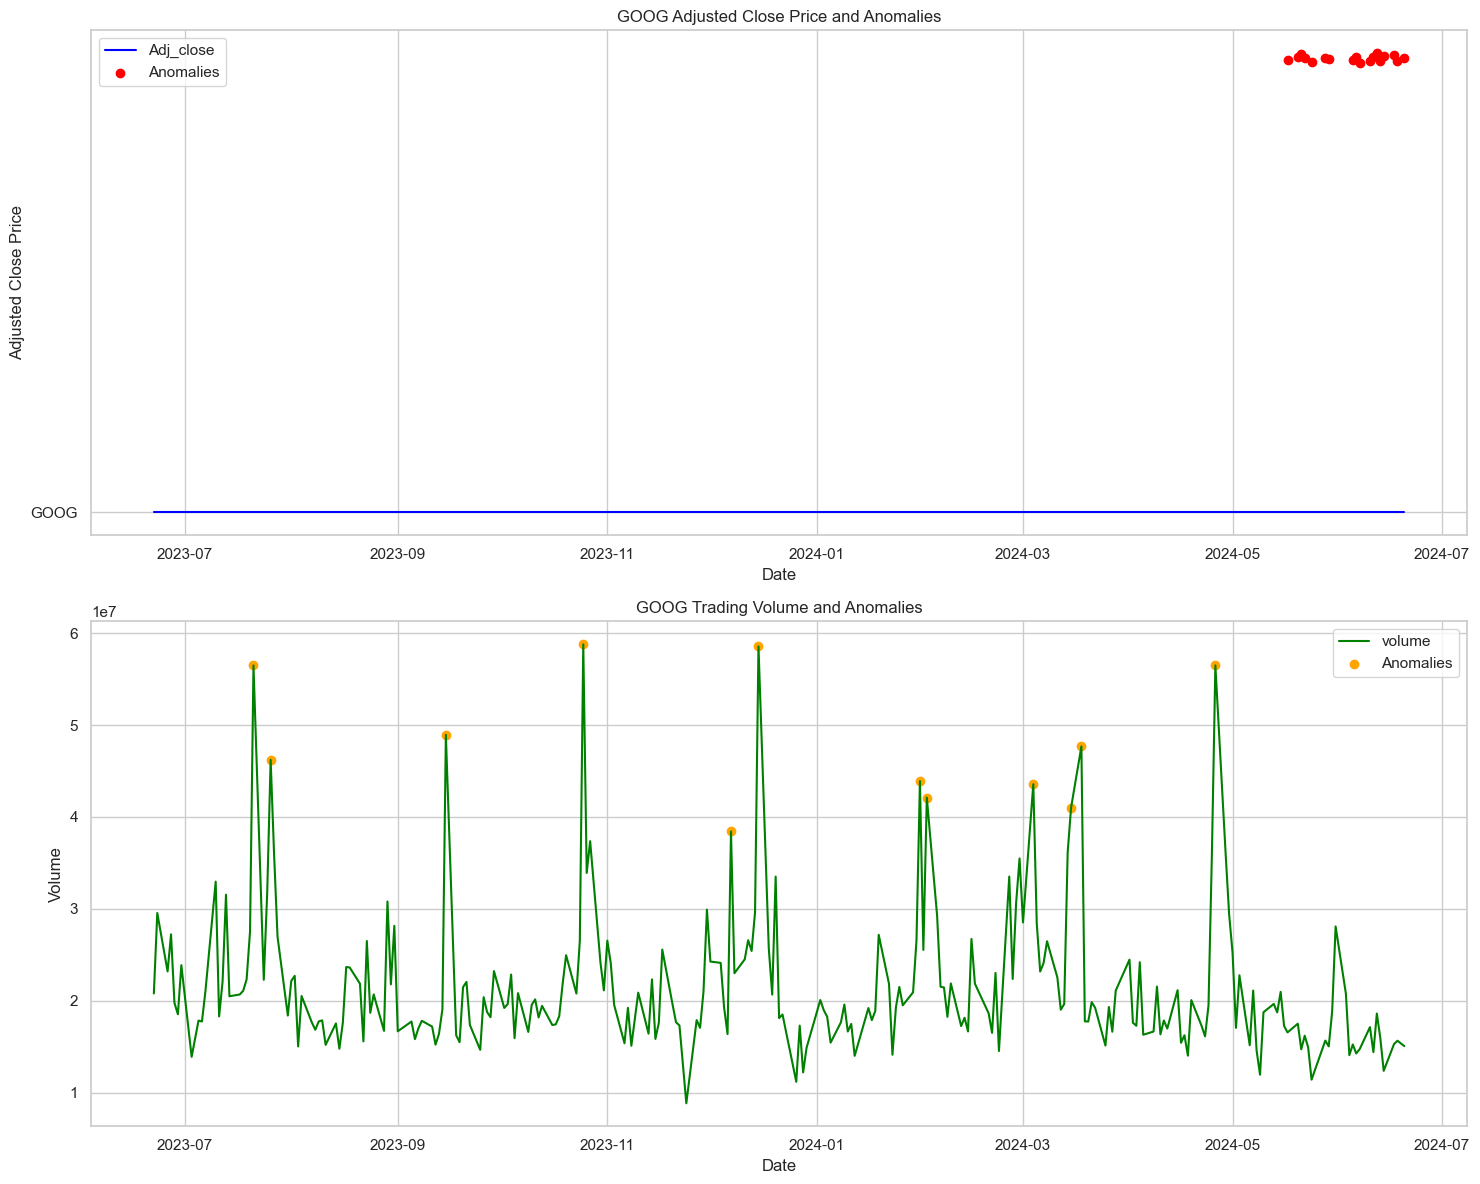

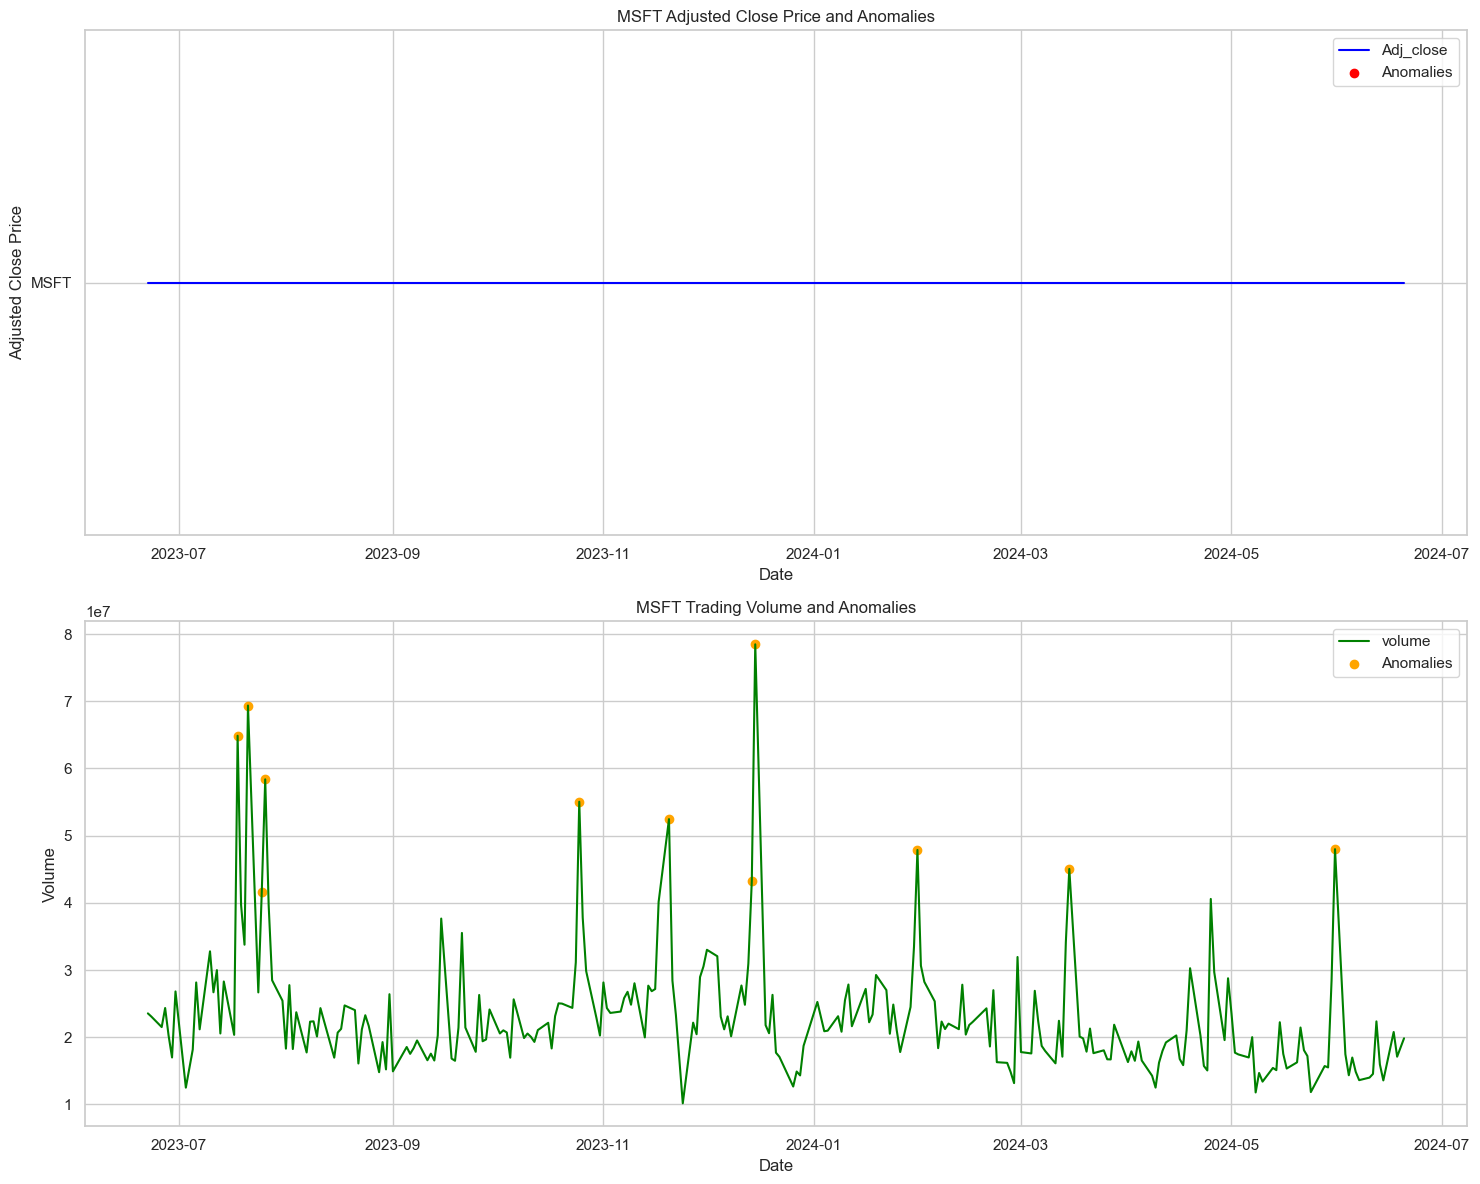

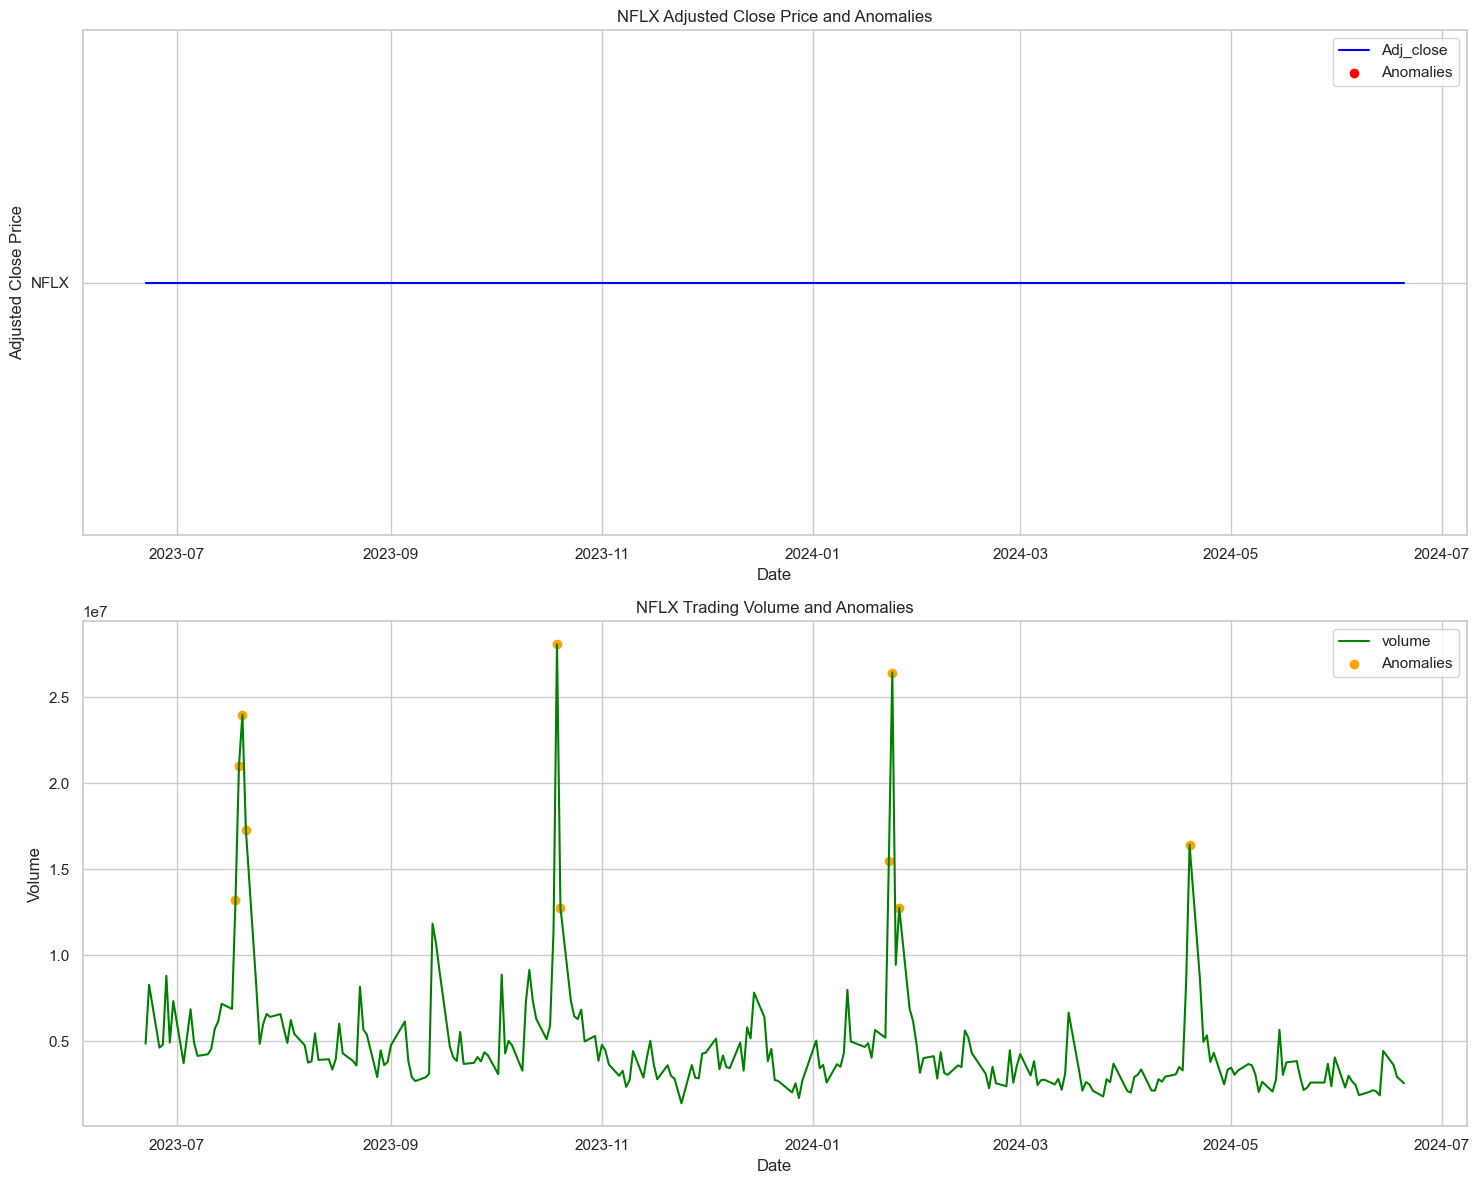

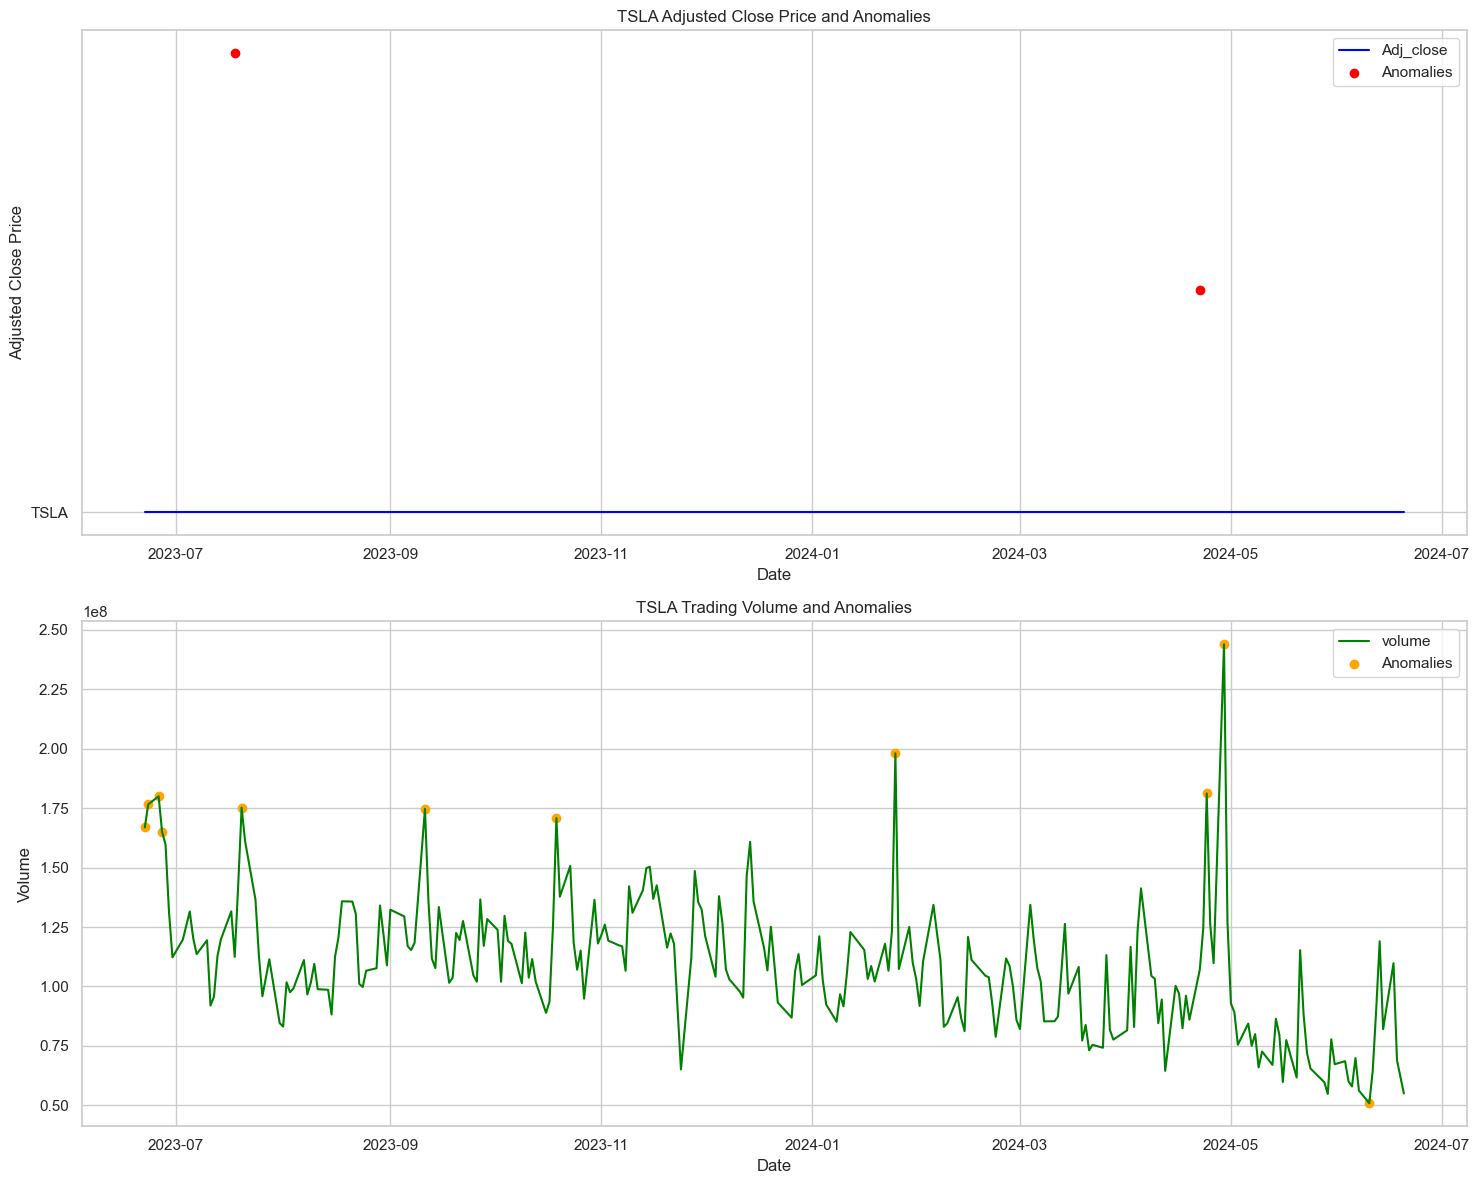

In [11]:
# plot the anomalies for each ticker based on adjusted close prices and volume
def plot_anomalies(ticker, anomalies_adj_close, anomalies_volume):
    #filter the main anomalies data for the given ticker
    data_ticker = stock_data_or[stock_data_or['Ticker'] == ticker]
    adj_close_anomalies = anomalies_adj_close[anomalies_adj_close['Ticker'] == ticker]
    volume_anomalies = anomalies_volume[anomalies_volume['Ticker'] == ticker]
    
    # plotting
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (15, 12))
    
    # plot for adjusted close price
    ax1.plot(data_ticker.index, data_ticker['Ticker'], 
             label = 'Adj_close', color = 'blue')
    ax1.scatter(adj_close_anomalies.index, adj_close_anomalies['Adj Close'],
               color = 'red', label = 'Anomalies')
    ax1.set_title(f'{ticker} Adjusted Close Price and Anomalies')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Adjusted Close Price')
    ax1.legend()

    
    # plot for volume
    ax2.plot(data_ticker.index, data_ticker['Volume'], 
             label = 'volume', color = 'green')
    ax2.scatter(volume_anomalies.index, volume_anomalies['Volume'],
               color = 'orange', label = 'Anomalies')
    ax2.set_title(f'{ticker} Trading Volume and Anomalies')
    ax2.set_xlabel('Date')
    ax2.set_ylabel('Volume')
    ax2.legend()
    
    plt.tight_layout()
    plt.show()
    

# plot the anomalies for each ticker
for ticker in stock_data_or['Ticker'].unique():
    plot_anomalies(ticker, anomalies_adj_close, anomalies_volume)

In [13]:
volume_anomalies.head()

Attribute,Ticker,Adj Close,Close,High,Low,Open,Volume,Z-score
Date,,,,,,,,
2023-06-22,TSLA,264.609985,264.609985,265.000000,248.250000,250.770004,166875900.0,2.144430
2023-06-23,TSLA,256.600006,256.600006,262.450012,252.800003,259.290009,176584100.0,2.503264
2023-06-26,TSLA,241.050003,241.050003,258.369995,240.699997,250.070007,179990600.0,2.629175
2023-06-27,TSLA,250.210007,250.210007,250.389999,240.850006,243.240005,164968200.0,2.073918
2023-07-20,TSLA,262.899994,262.899994,280.929993,261.200012,279.559998,175158300.0,2.450564
